In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_DIRECTORY_PATH = '../data/'

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#member" data-toc-modified-id="member-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>member</a></span><ul class="toc-item"><li><span><a href="#city" data-toc-modified-id="city-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>city</a></span></li><li><span><a href="#bd" data-toc-modified-id="bd-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>bd</a></span></li><li><span><a href="#gender" data-toc-modified-id="gender-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>gender</a></span></li><li><span><a href="#registered_via" data-toc-modified-id="registered_via-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>registered_via</a></span></li><li><span><a href="#registration_init_time" data-toc-modified-id="registration_init_time-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>registration_init_time</a></span></li><li><span><a href="#expiration_date" data-toc-modified-id="expiration_date-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>expiration_date</a></span></li></ul></li></ul></div>

In [2]:
train_df = pd.read_csv(DATA_DIRECTORY_PATH + 'train.csv')
test_df = pd.read_csv(DATA_DIRECTORY_PATH + 'test.csv')
comb_df = train_df.append(test_df)
members_df = pd.read_csv(DATA_DIRECTORY_PATH + 'members.csv')
songs_df = pd.read_csv(DATA_DIRECTORY_PATH + 'songs.csv')
song_extra_info_df = pd.read_csv(DATA_DIRECTORY_PATH + 'song_extra_info.csv')

songs_df = songs_df.merge(song_extra_info_df, on='song_id', how='left')

train_df = train_df.merge(songs_df, on='song_id', how='left')
test_df = test_df.merge(songs_df, on='song_id', how='left')

train_df = train_df.merge(members_df, on='msno', how='left')
test_df = test_df.merge(members_df, on='msno', how='left')

# fill missing data to visualize
train_df.fillna('nan', inplace=True)
test_df.fillna('nan', inplace=True)

# member

## city

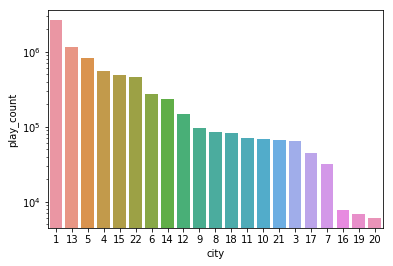

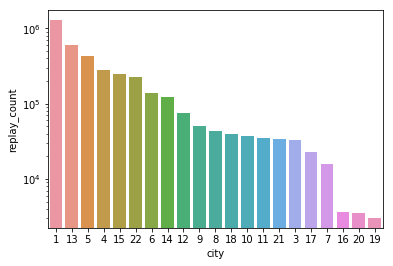

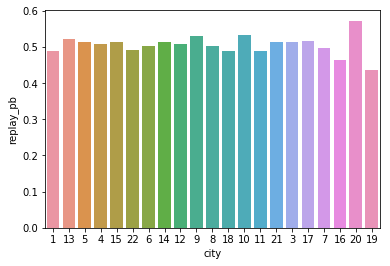

-0.0390307723739
-0.0468755538298
0.999618409452


,city,replay_pb,play_count,replay_count
0,1,0.489684,2621293,1283606
11,13,0.521679,1144863,597251
3,5,0.513664,830128,426407
2,4,0.507215,545820,276848
13,15,0.512750,484078,248211
20,22,0.491634,460330,226314
4,6,0.501275,275781,138242
12,14,0.514366,236639,121719
10,12,0.507405,147133,74656
7,9,0.529983,95237,50474


In [3]:
city_df = train_df[['city', 'target']].groupby('city').agg(['mean', 'count']).reset_index()
city_df.columns = ['city', 'replay_pb', 'play_count']
city_df['replay_count'] = (city_df['replay_pb'] * city_df['play_count']).astype(np.int32)

g = sns.barplot(x='city', y='play_count', data=city_df, order=city_df.sort_values(by=['play_count'], ascending=False)['city'])
g.set_yscale('log', nonposy='clip')
plt.show()

g = sns.barplot(x='city', y='replay_count', data=city_df, order=city_df.sort_values(by=['replay_count'], ascending=False)['city'])
g.set_yscale('log', nonposy='clip')
plt.show()

sns.barplot(x='city', y='replay_pb', data=city_df, order=city_df.sort_values(by=['replay_count'], ascending=False)['city'])
plt.show()

print(city_df['replay_count'].corr(city_df['replay_pb']))
print(city_df['play_count'].corr(city_df['replay_pb']))
print(city_df['play_count'].corr(city_df['replay_count']))

# sns.jointplot(x="play_count", y="replay_pb", data=city_df, kind="reg")

city_df.sort_values(by=['play_count'], ascending=False)

City 1 is the main city. 

## bd

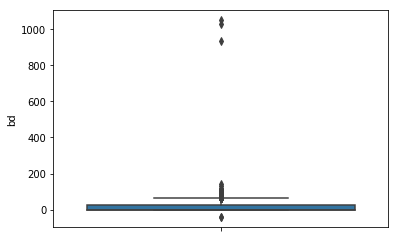

In [4]:
bd_members_df = members_df[['msno', 'bd']]

sns.boxplot(y=bd_members_df['bd'])
plt.show()

Obviously, it has unbelievable bd values.

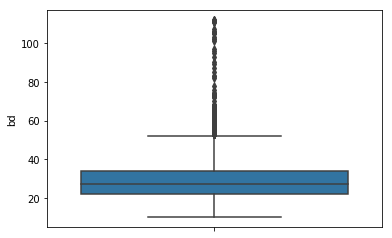

In [5]:
bd_members_df = members_df[['msno', 'bd']]
# remove invalid values
bd_members_df = bd_members_df[(bd_members_df['bd'] > 7) & (bd_members_df['bd'] < 120)]
sns.boxplot(y=bd_members_df['bd'])
plt.show()

bd_mean = bd_members_df['bd'].mean()
bd_std = bd_members_df['bd'].std()

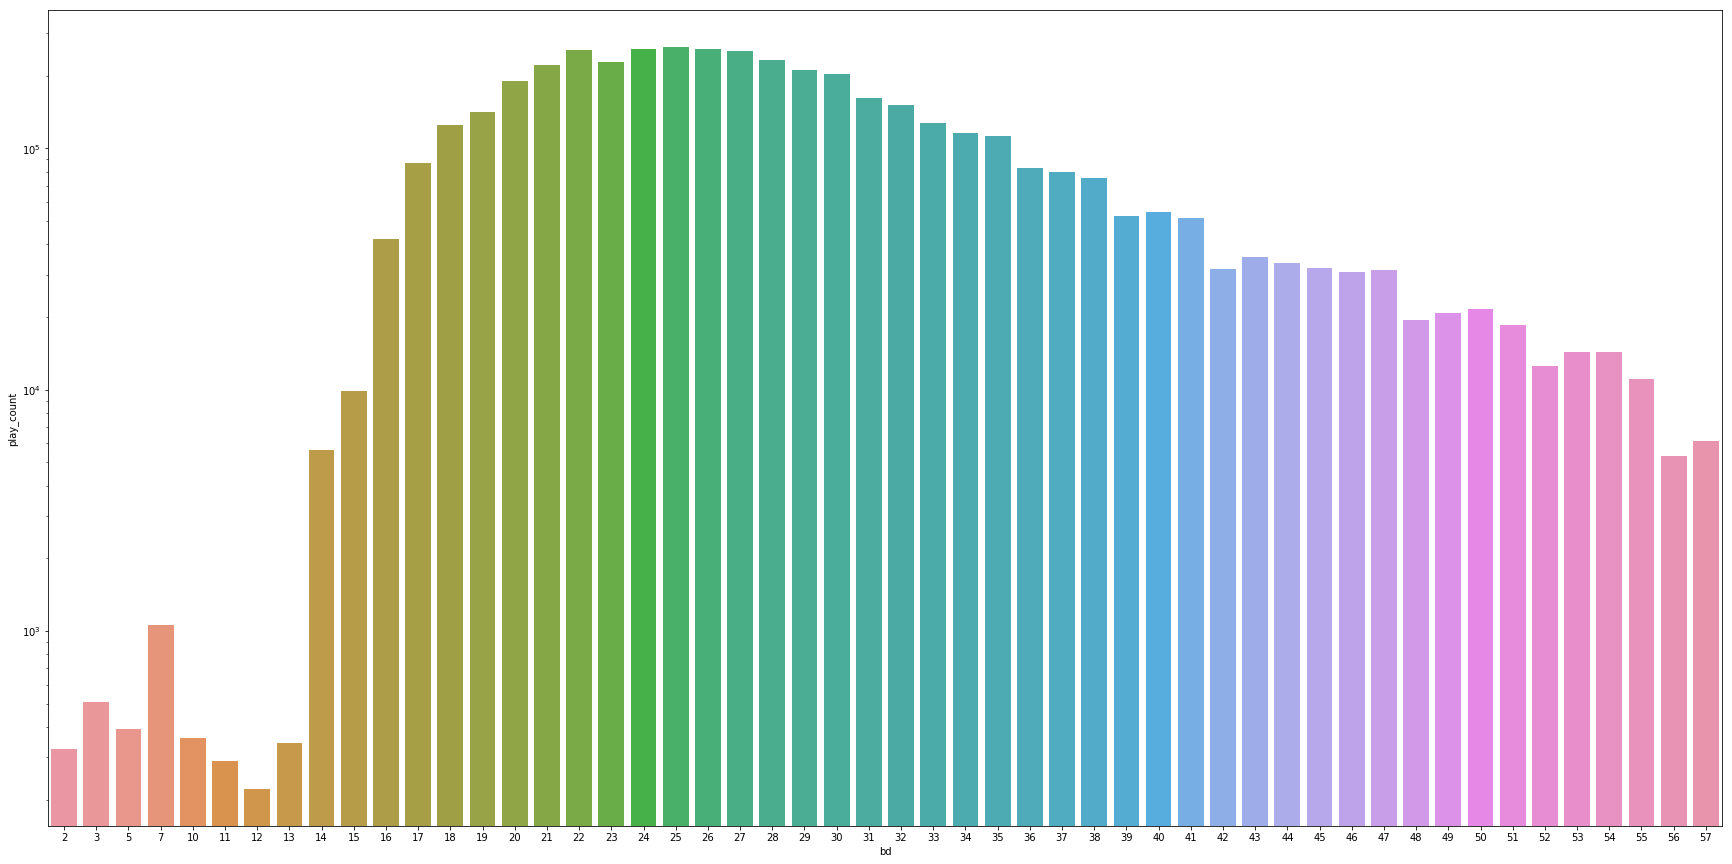

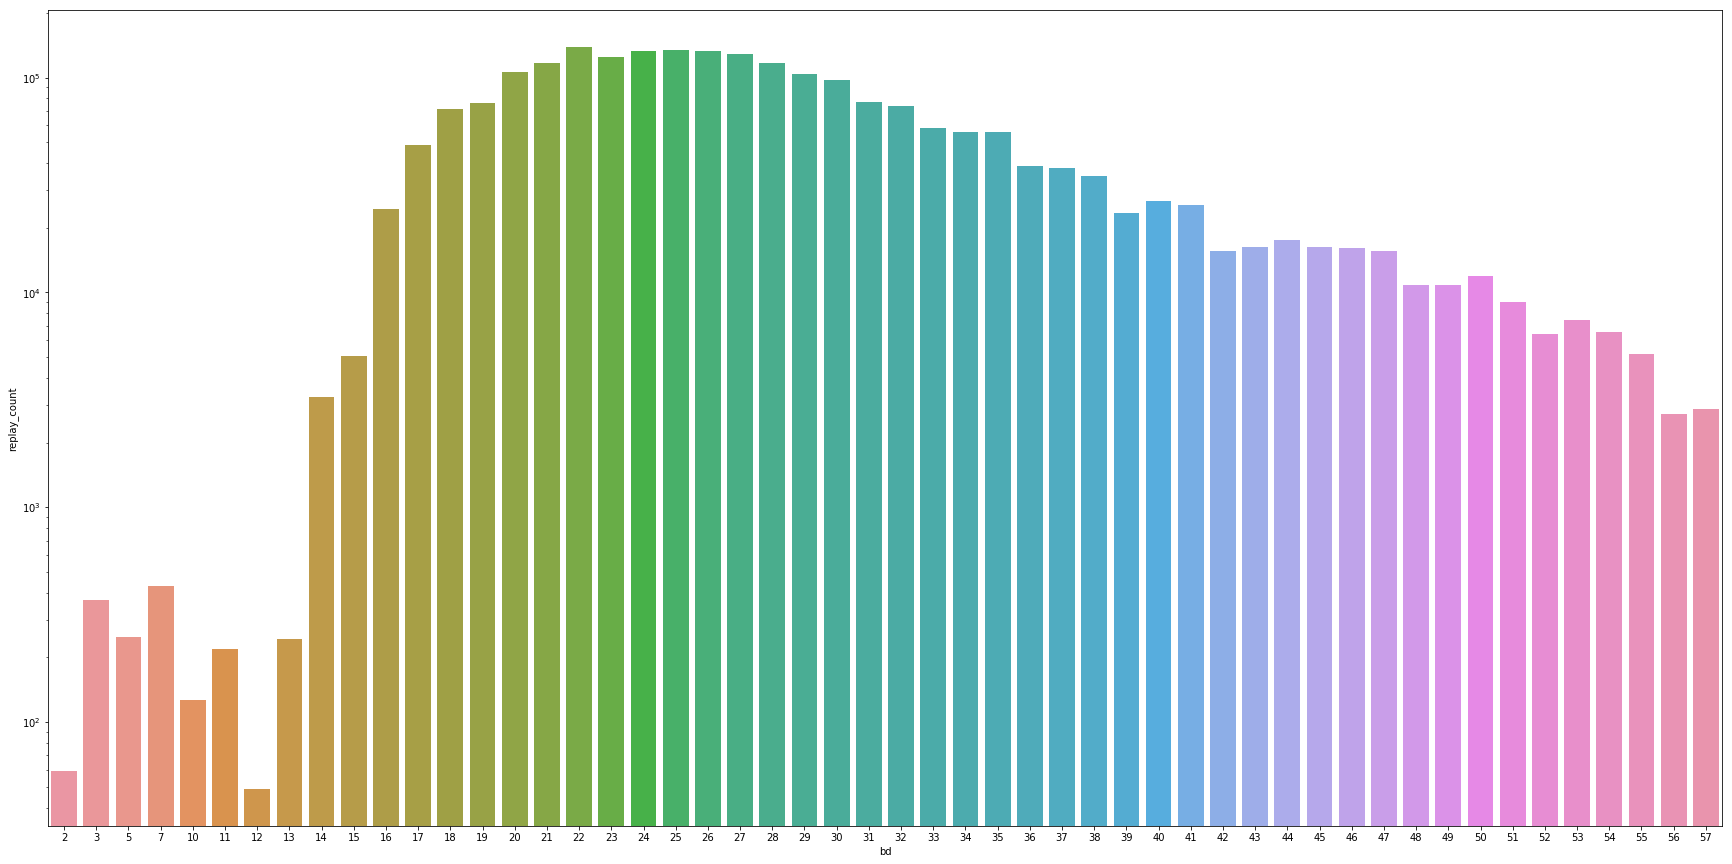

In [6]:
bd_df = train_df[['bd', 'target']].groupby('bd').agg(['mean', 'count']).reset_index()
bd_df.columns = ['bd', 'replay_pb', 'play_count']
bd_df['replay_count'] = (bd_df['replay_pb'] * bd_df['play_count']).astype(np.int32)

# remove outliers
bd_df = bd_df[np.abs(bd_df['bd'] - bd_mean) <= 3 * bd_std]
plt.figure(figsize=(30, 15)) 
g = sns.barplot(x='bd', y='play_count', data=bd_df)
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(30, 15)) 
g = sns.barplot(x='bd', y='replay_count', data=bd_df)
g.set_yscale('log', nonposy='clip')
plt.show()

The age between 22 and 27 is the main users.

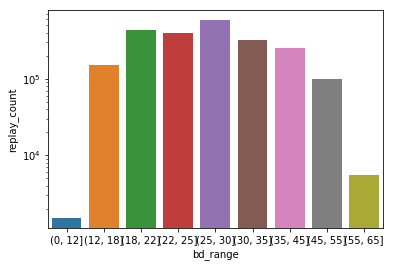

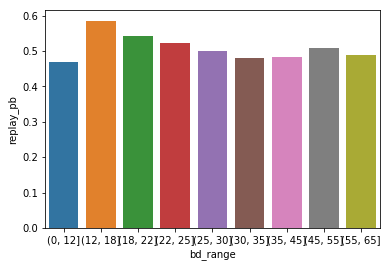

In [7]:
bd_length_bins = [0, 12, 18, 22, 25, 30, 35, 45, 55, 65]
bd_df['cut_bd_length'] = pd.cut(bd_df['bd'], bins=bd_length_bins)
tmp_bd_df = bd_df.groupby('cut_bd_length').agg(['mean', 'sum']).reset_index()
tmp_bd_df.columns = ['bd_range', '_', '_', 'replay_pb', '_', '_', 'play_count', '_', 'replay_count']
tmp_bd_df.drop(['_'], axis=1, inplace=True)
tmp_bd_df

g = sns.barplot(x='bd_range', y='replay_count', data=tmp_bd_df)
g.set_yscale('log', nonposy='clip')
plt.show()

sns.barplot(x='bd_range', y='replay_pb', data=tmp_bd_df)
plt.show()

The users whose age is between 12 and 18 have the most chance to replay even through they didn't play songs as many as others.

## gender

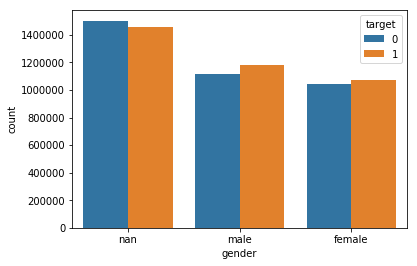

In [8]:
sns.countplot(x='gender', hue='target', data=train_df, order=train_df['gender'].value_counts().index)
plt.show()

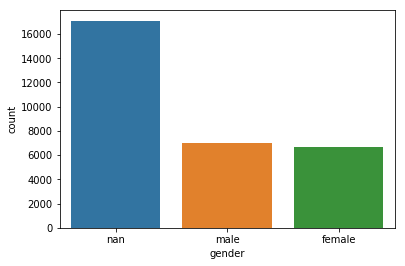

nan       17092
male       7004
female     6659
Name: gender, dtype: int64


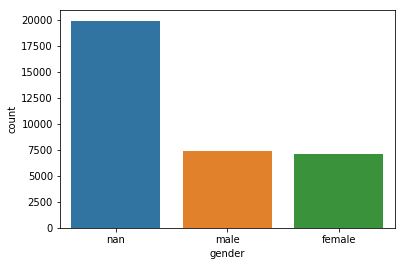

nan       19902
male       7405
female     7096
Name: gender, dtype: int64


In [9]:
count_df = train_df[['msno', 'gender']].drop_duplicates('msno')
sns.countplot(x='gender', data=count_df, order=count_df['gender'].value_counts().index)
plt.show()
print(count_df['gender'].value_counts())

count_df = members_df[['msno', 'gender']].fillna('nan').drop_duplicates('msno')
sns.countplot(x='gender', data=count_df, order=count_df['gender'].value_counts().index)
plt.show()
print(count_df['gender'].value_counts())

It is obvious that **female** users almost equal to **male** users. In this opinion, we may fill missing data randomly with *female* or *male*. 

## registered_via

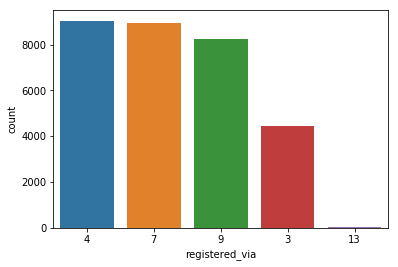

4     9039
7     8944
9     8246
3     4469
13      57
Name: registered_via, dtype: int64


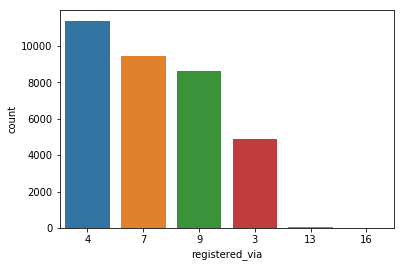

4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: registered_via, dtype: int64


In [10]:
count_df = train_df[['msno', 'registered_via']].drop_duplicates('msno')
sns.countplot(x='registered_via', data=count_df, order=count_df['registered_via'].value_counts().index)
plt.show()
print(count_df['registered_via'].value_counts())

count_df = members_df[['msno', 'registered_via']].fillna('nan')
sns.countplot(x='registered_via', data=count_df, order=count_df['registered_via'].value_counts().index)
plt.show()
print(count_df['registered_via'].value_counts())

There are total **5** methods (exactly, 6) users register from.
But method *16* has only one user and never play songs, then we ignore it.
We can know methods **4, 7, 9** are main.

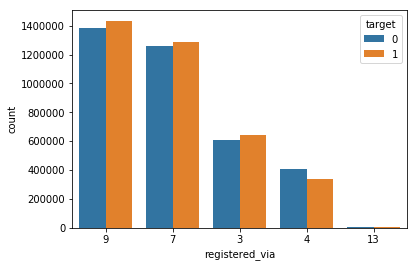

9     2814535
7     2551743
3     1250790
4      745251
13      15099
Name: registered_via, dtype: int64


In [11]:
count_df = train_df[['registered_via', 'target']]
sns.countplot(x='registered_via', hue='target', data=count_df, order=count_df['registered_via'].value_counts().index)
plt.show()
print(count_df['registered_via'].value_counts())

With a surprise, <font color='blue'>method 4 </font>is the main registration method, but the users registered from that method play less than others.
Moreover, its replay chance is lower than 0.5.

## registration_init_time

In [12]:
def transform_init_time_to_ym(time):
    time_str = str(time)
    year = int(time_str[:4])
    month = int(time_str[4:6])
    return int("%04d%02d" % (year, month))

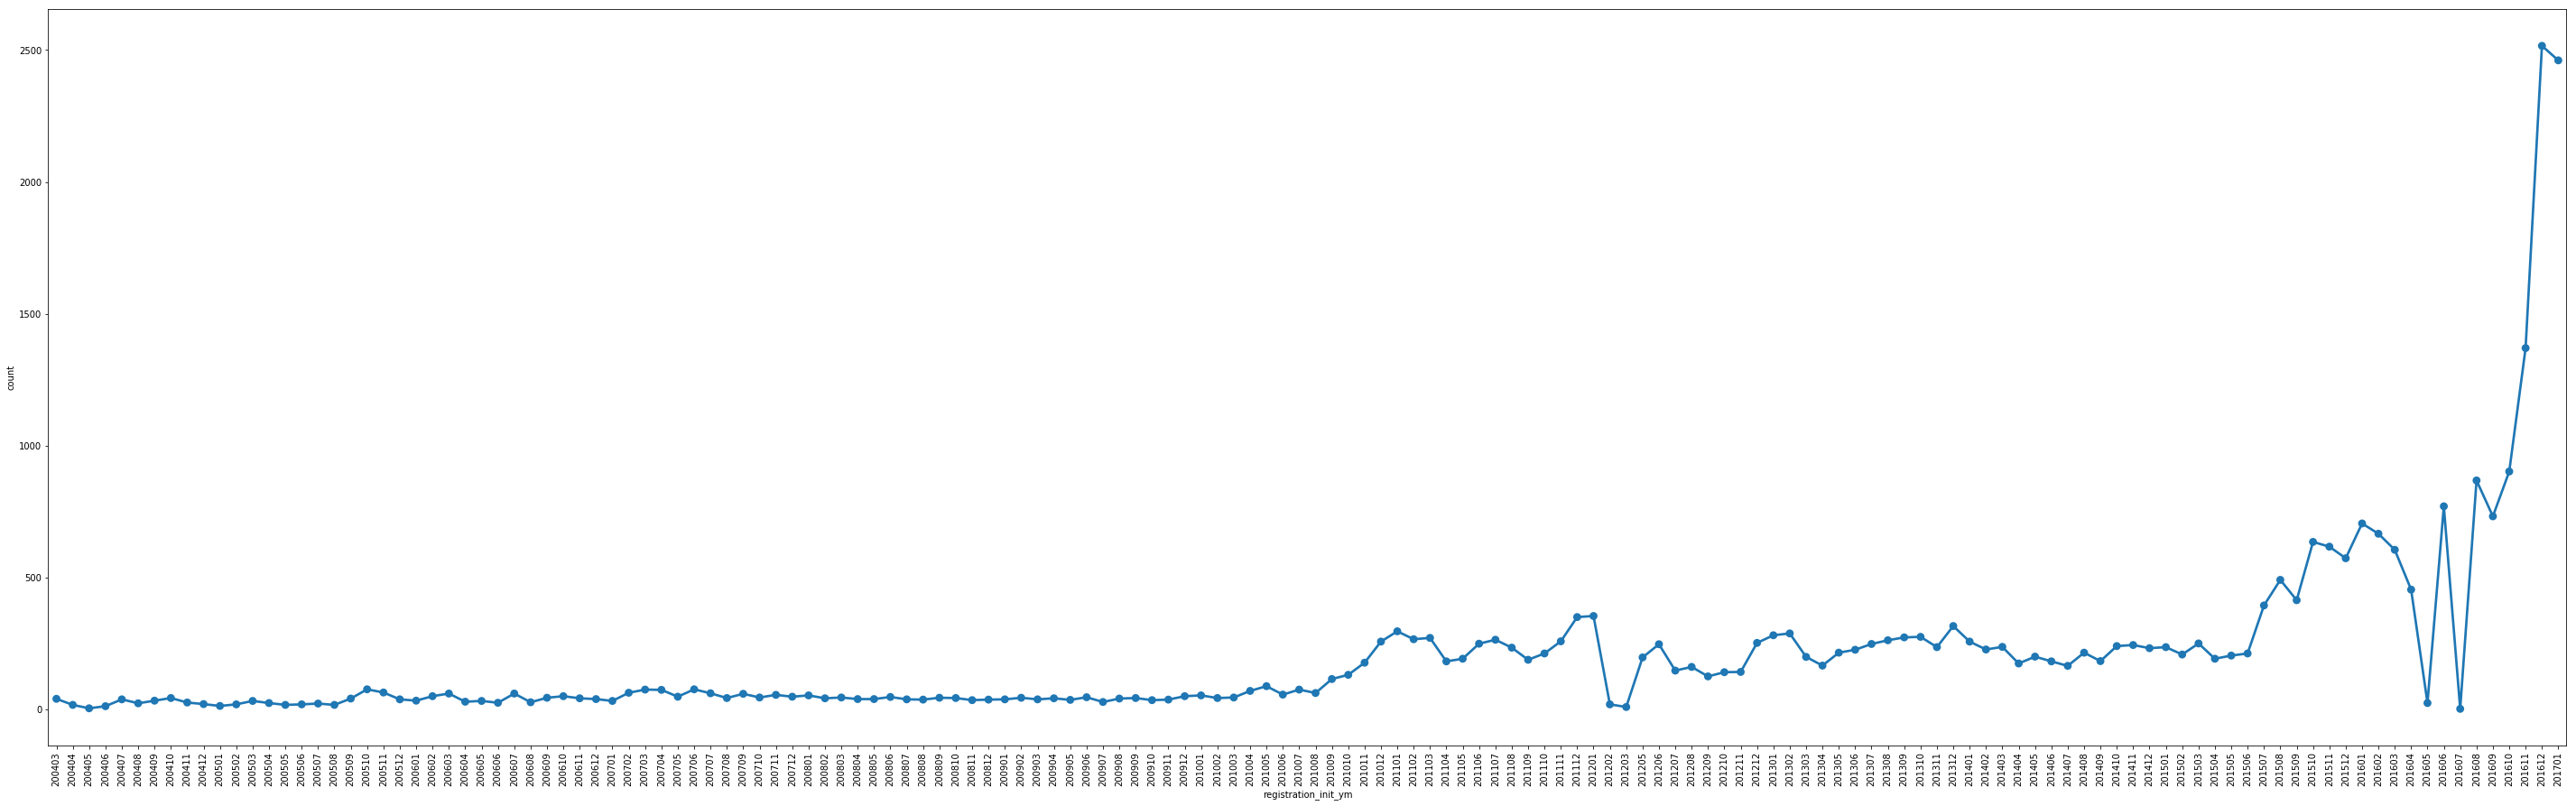

/usr/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


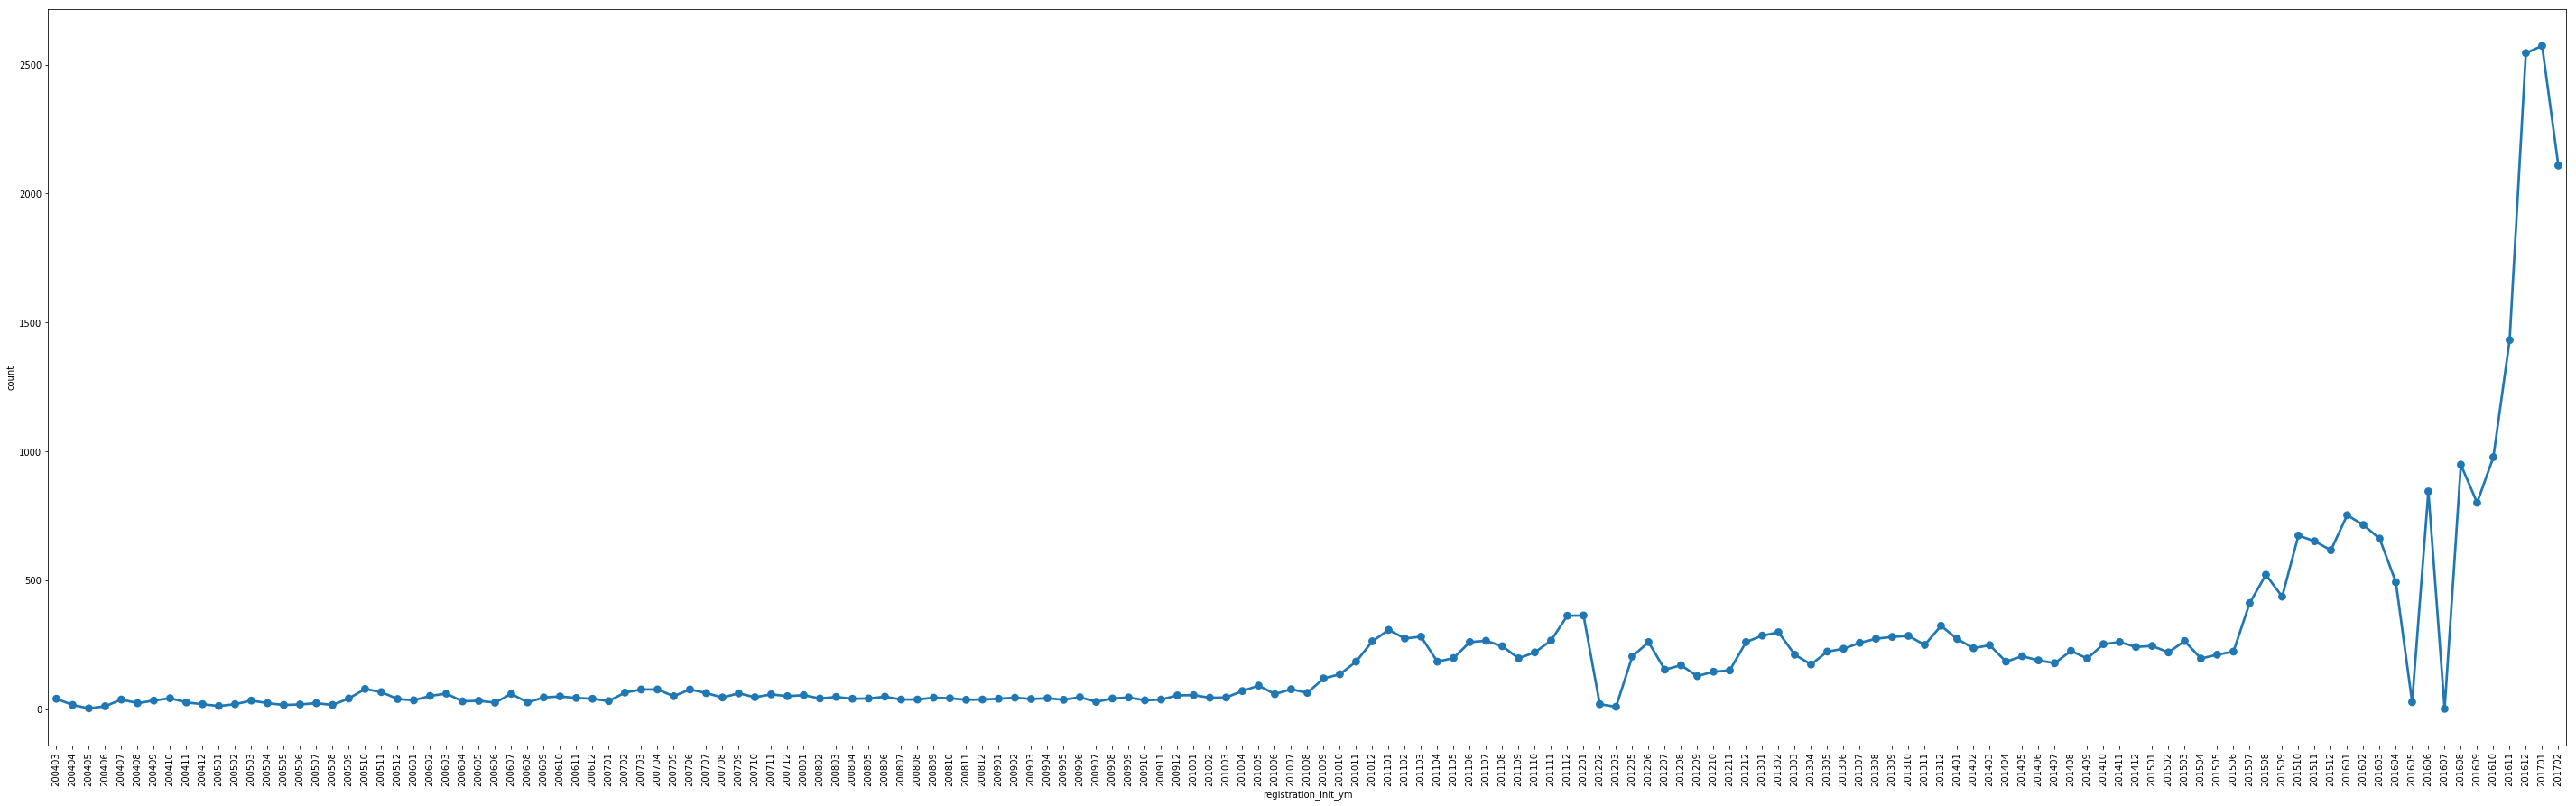

In [13]:
# Consider year, month.
count_df = train_df[['msno', 'registration_init_time']].drop_duplicates('msno')
count_df['registration_init_ym'] = count_df['registration_init_time'].apply(transform_init_time_to_ym)

tmp_count_df = count_df[['msno', 'registration_init_ym']].groupby('registration_init_ym').agg('count').reset_index()

tmp_count_df.columns = ['registration_init_ym', 'count']
tmp_count_df

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.pointplot(x='registration_init_ym', y='count', data=tmp_count_df)
plt.show()

# ===================================================================================================================
count_df = members_df[['msno', 'registration_init_time']]
count_df['registration_init_ym'] = count_df['registration_init_time'].apply(transform_init_time_to_ym)

tmp_count_df = count_df[['msno', 'registration_init_ym']].groupby('registration_init_ym').agg('count').reset_index()

tmp_count_df.columns = ['registration_init_ym', 'count']
tmp_count_df

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.pointplot(x='registration_init_ym', y='count', data=tmp_count_df)
plt.show()

The amount of registration is rapidly increasing after **Aug. 2016**.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
registration_init_ym    154 non-null int64
replay_pb               154 non-null float64
play_count              154 non-null int64
replay_count            154 non-null int32
dtypes: float64(1), int32(1), int64(2)
memory usage: 4.3 KB
None


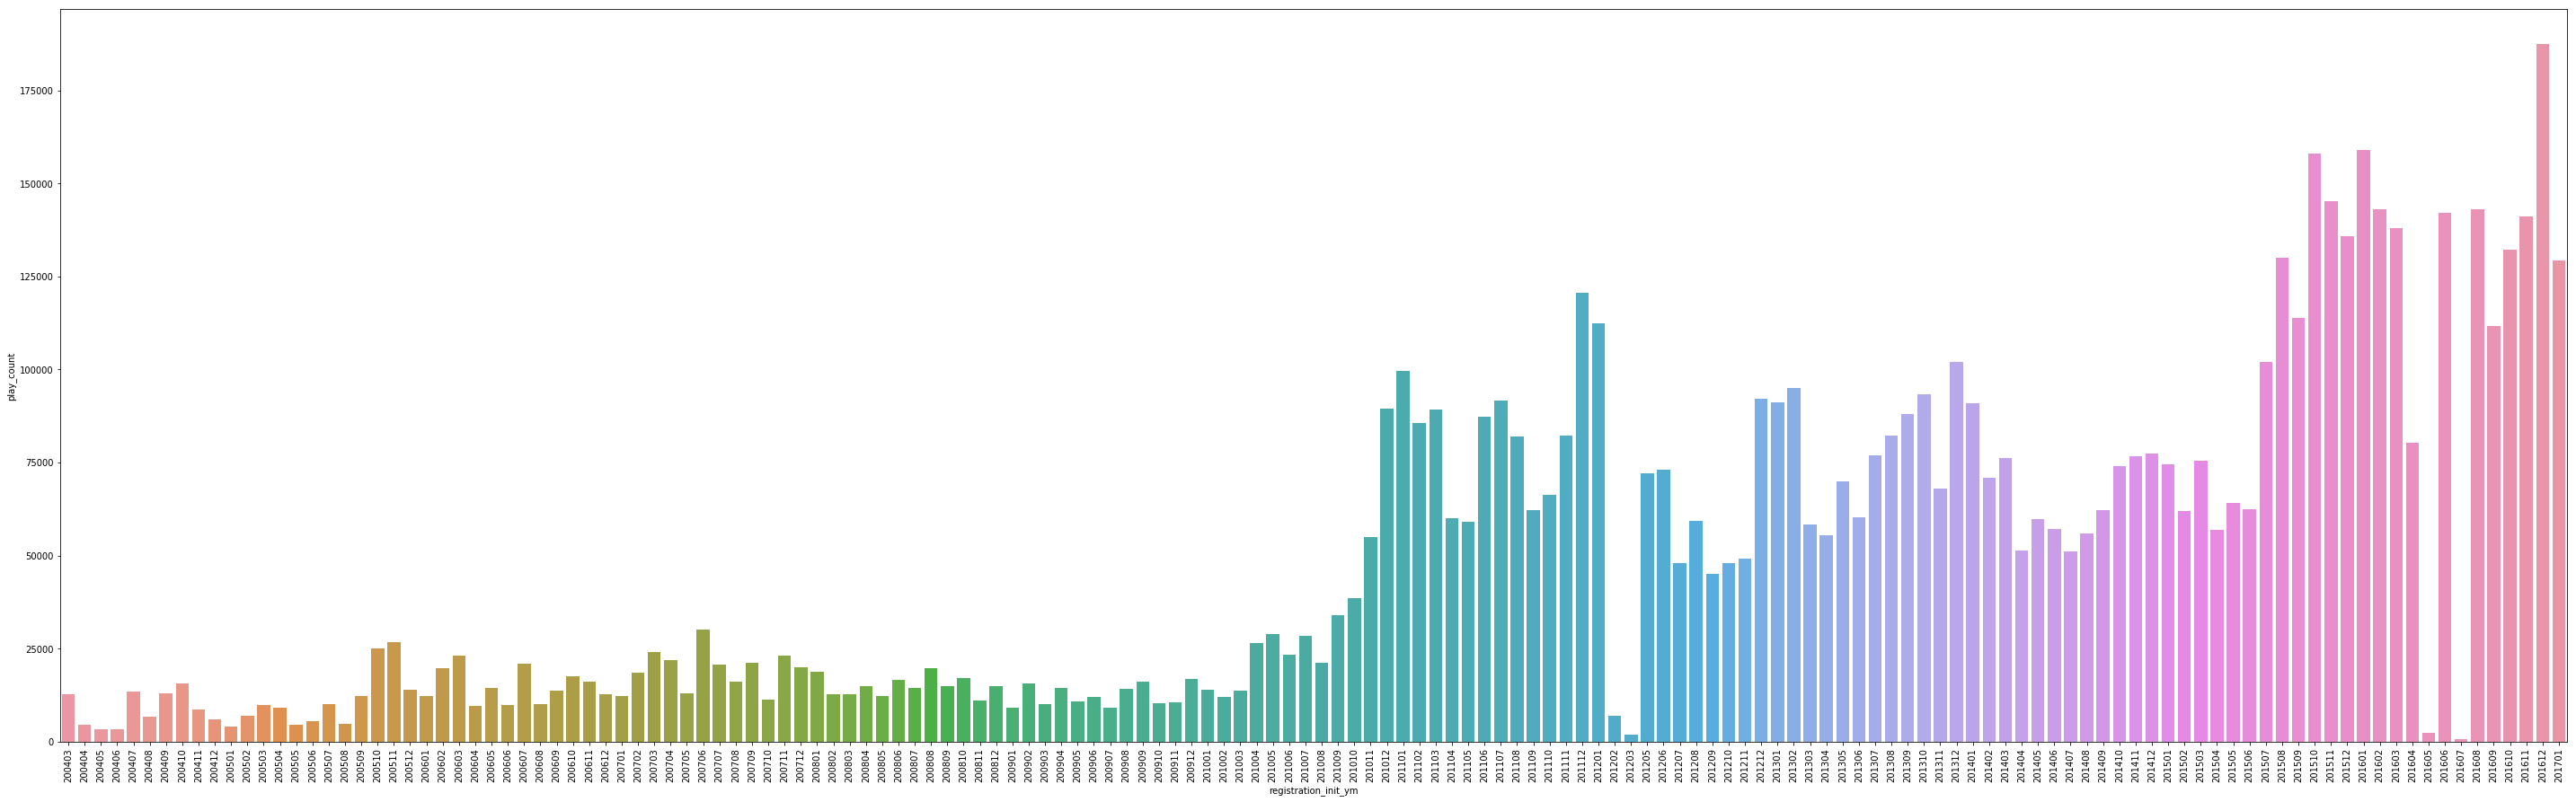

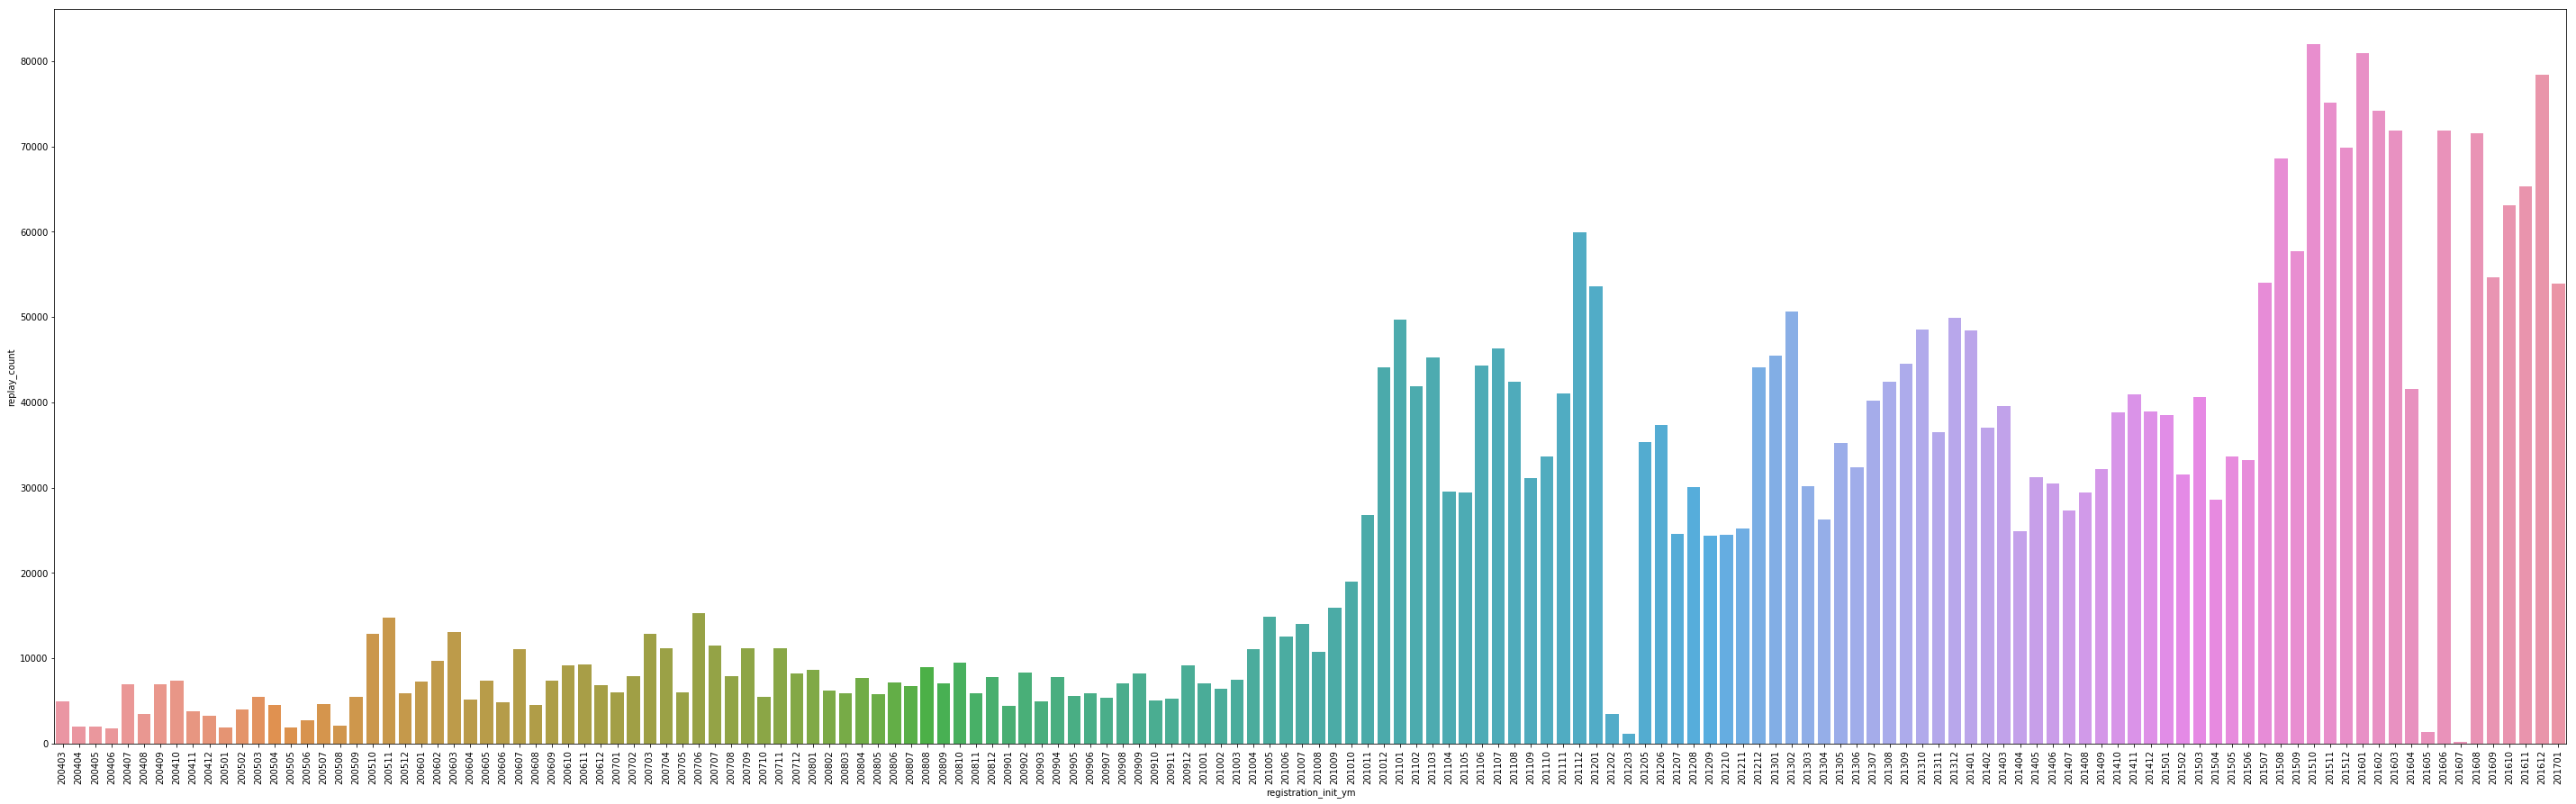

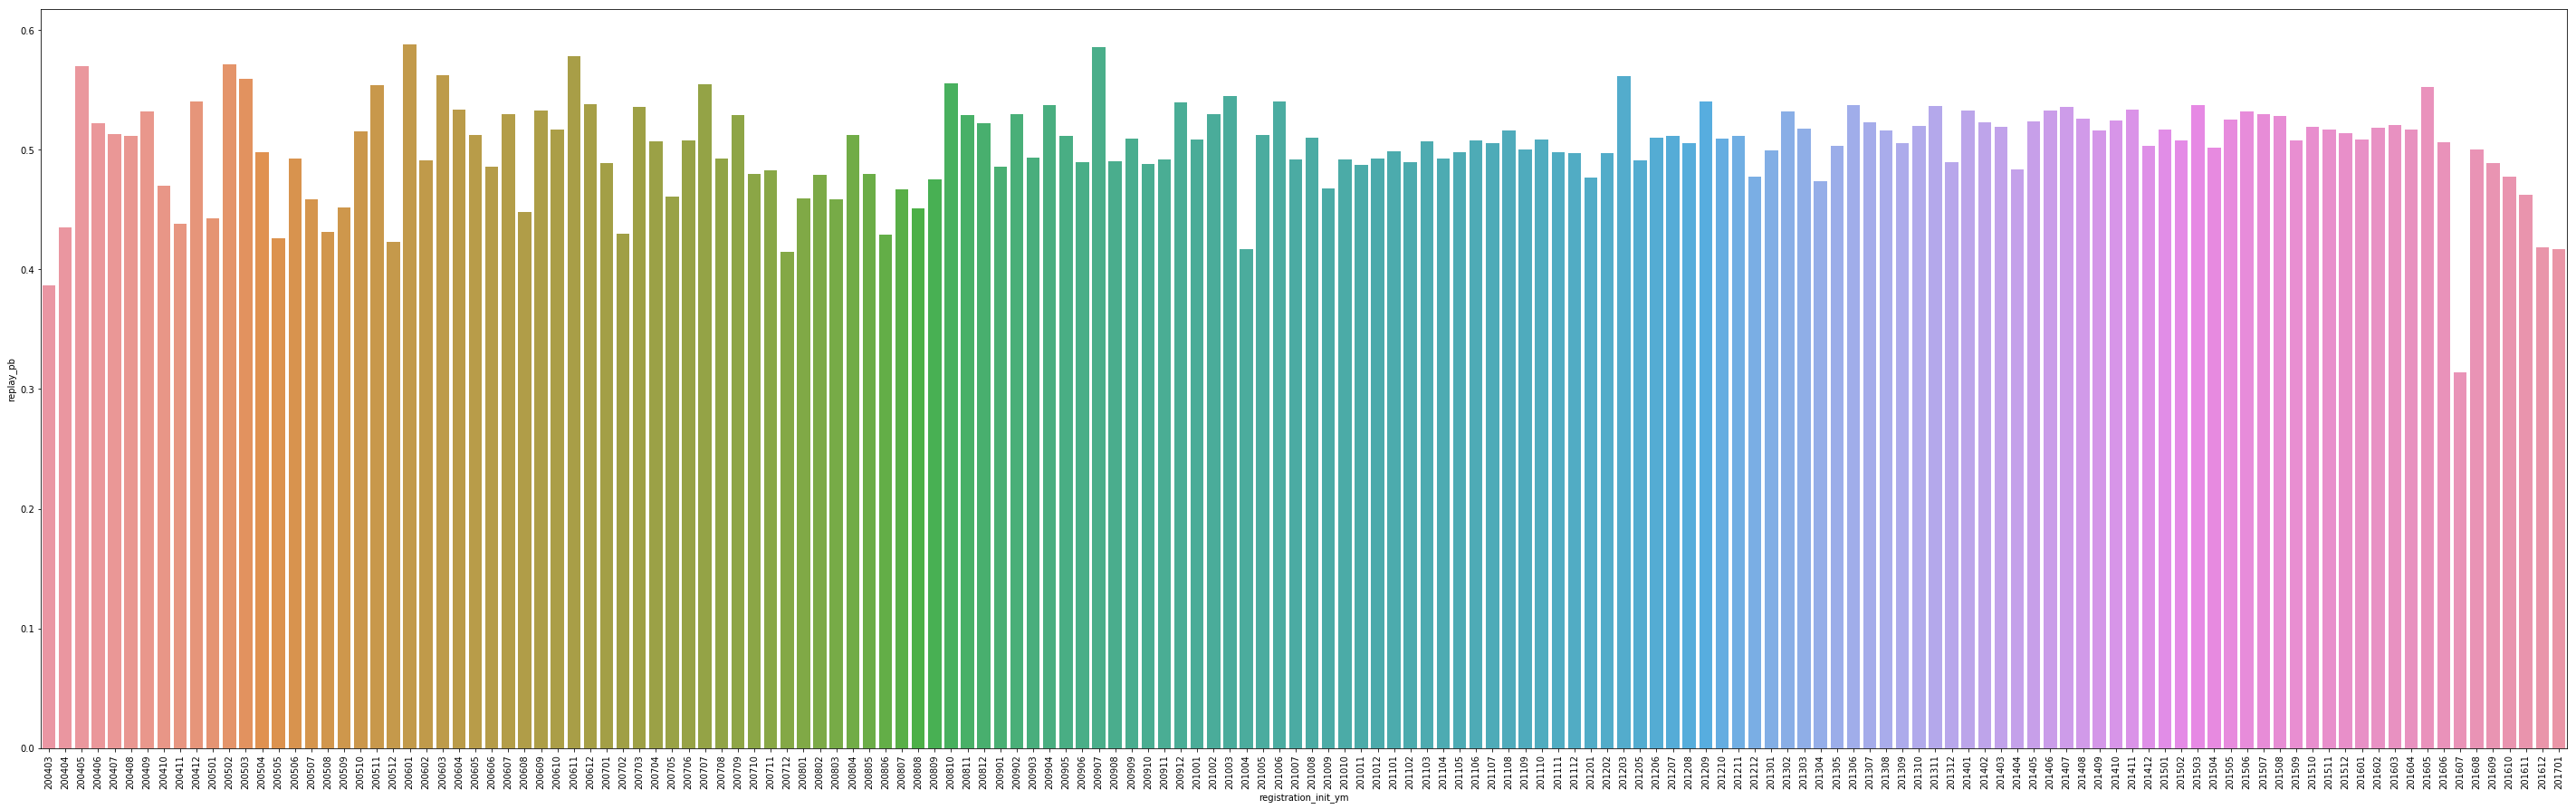

0.0816956567528
0.0313920909608
0.995866609863


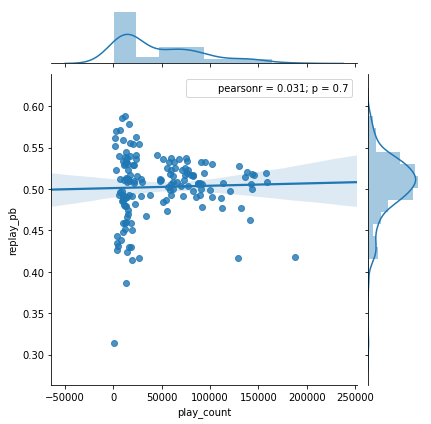

,registration_init_ym,replay_pb,play_count,replay_count
152,201612,0.418480,187452,78445
141,201601,0.508748,159012,80897
138,201510,0.518823,158000,81974
139,201511,0.516863,145346,75124
142,201602,0.518482,143089,74189
148,201608,0.499937,143048,71515
146,201606,0.505952,142051,71871
151,201611,0.462722,141197,65335
143,201603,0.520516,137967,71814
140,201512,0.514207,135774,69816


In [14]:
count_df = train_df[['msno', 'registration_init_time', 'target']].copy()
count_df['registration_init_ym'] = count_df['registration_init_time'].apply(transform_init_time_to_ym)

reg_init_df = count_df[['registration_init_ym', 'target']].groupby('registration_init_ym').agg(['mean', 'count']).reset_index()
reg_init_df.columns = ['registration_init_ym', 'replay_pb', 'play_count']

reg_init_df['replay_count'] = (reg_init_df['replay_pb'] * reg_init_df['play_count']).astype(np.int32)

print(reg_init_df.info())
plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
sns.barplot(x='registration_init_ym', y='play_count', data=reg_init_df.sort_values(by=['play_count'], ascending=False))
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
sns.barplot(x='registration_init_ym', y='replay_count', data=reg_init_df.sort_values(by=['replay_count'], ascending=False))
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
sns.barplot(x='registration_init_ym', y='replay_pb', data=reg_init_df.sort_values(by=['replay_count'], ascending=False))
plt.show()

print(reg_init_df['replay_count'].corr(reg_init_df['replay_pb']))
print(reg_init_df['play_count'].corr(reg_init_df['replay_pb']))
print(reg_init_df['play_count'].corr(reg_init_df['replay_count']))

g = sns.jointplot(x="play_count", y="replay_pb", data=reg_init_df, kind="reg")
plt.show()
reg_init_df.sort_values(by=['play_count'], ascending=False)

## expiration_date

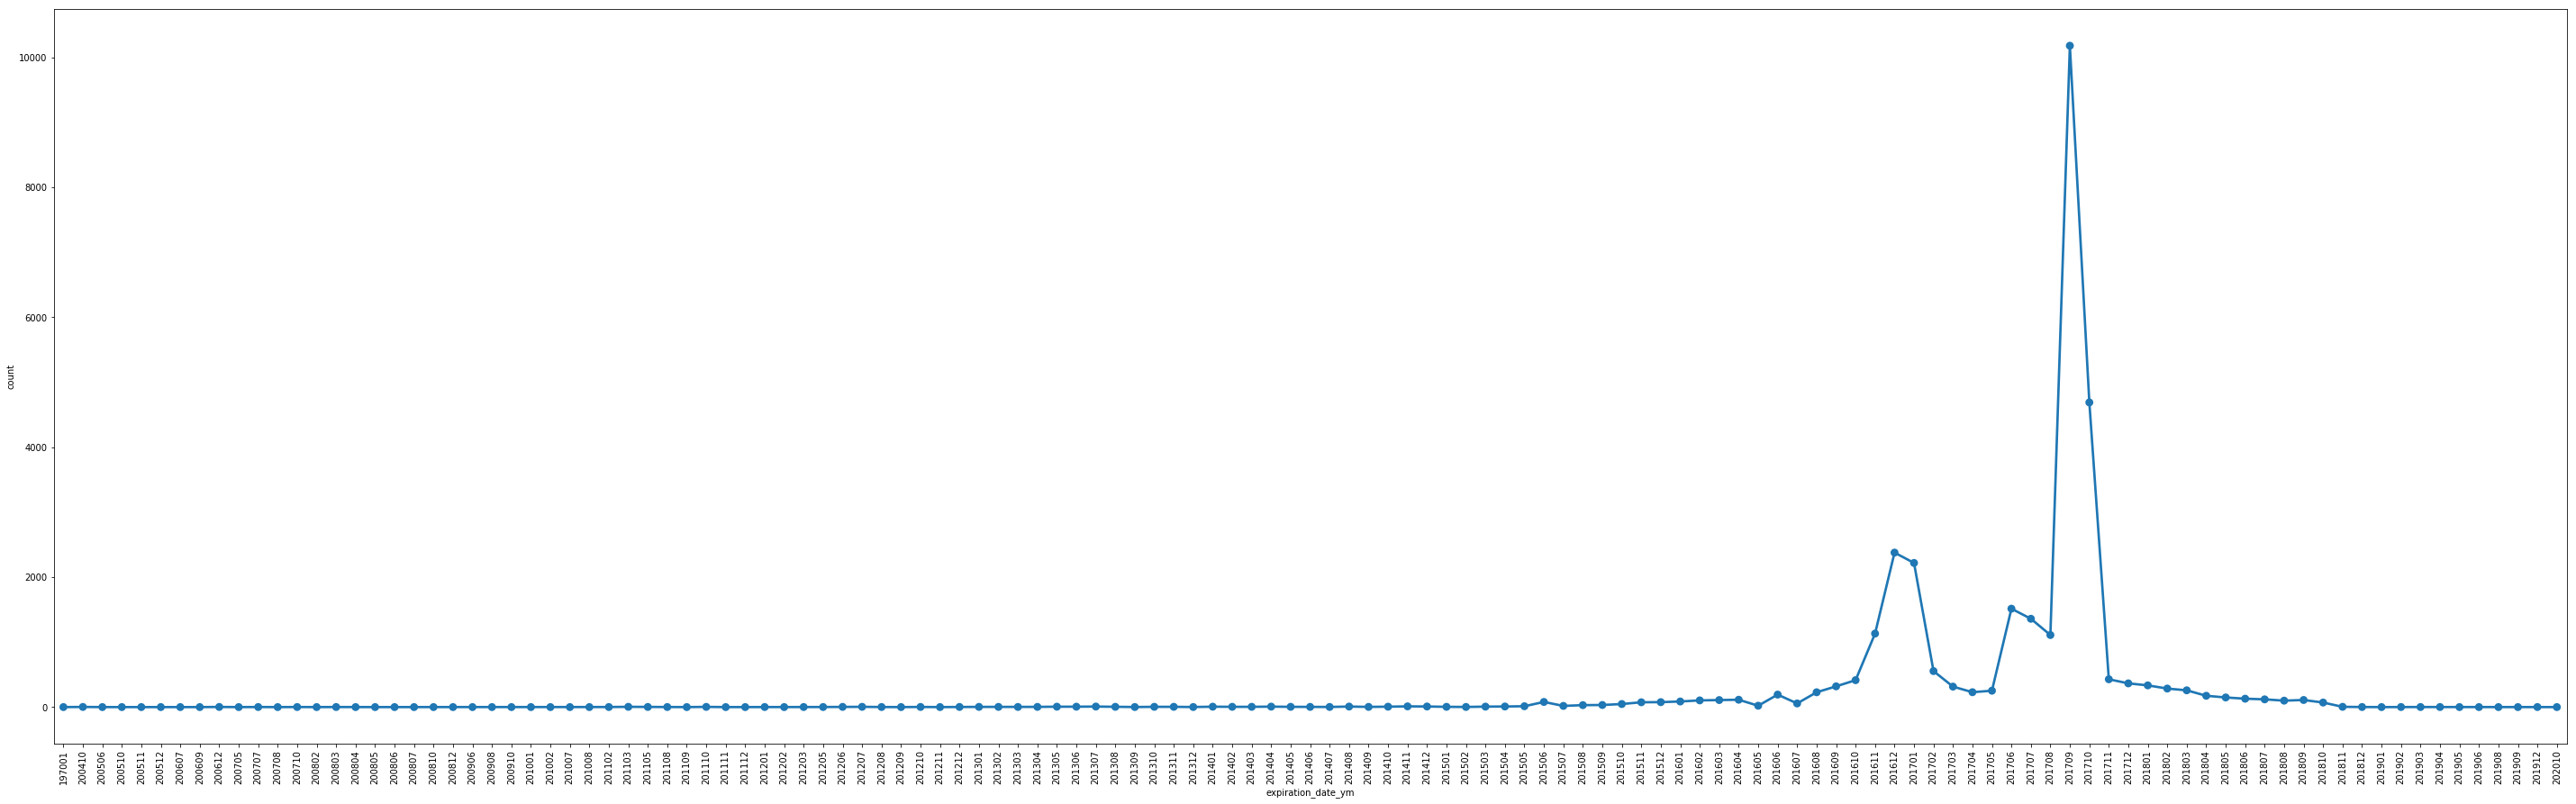

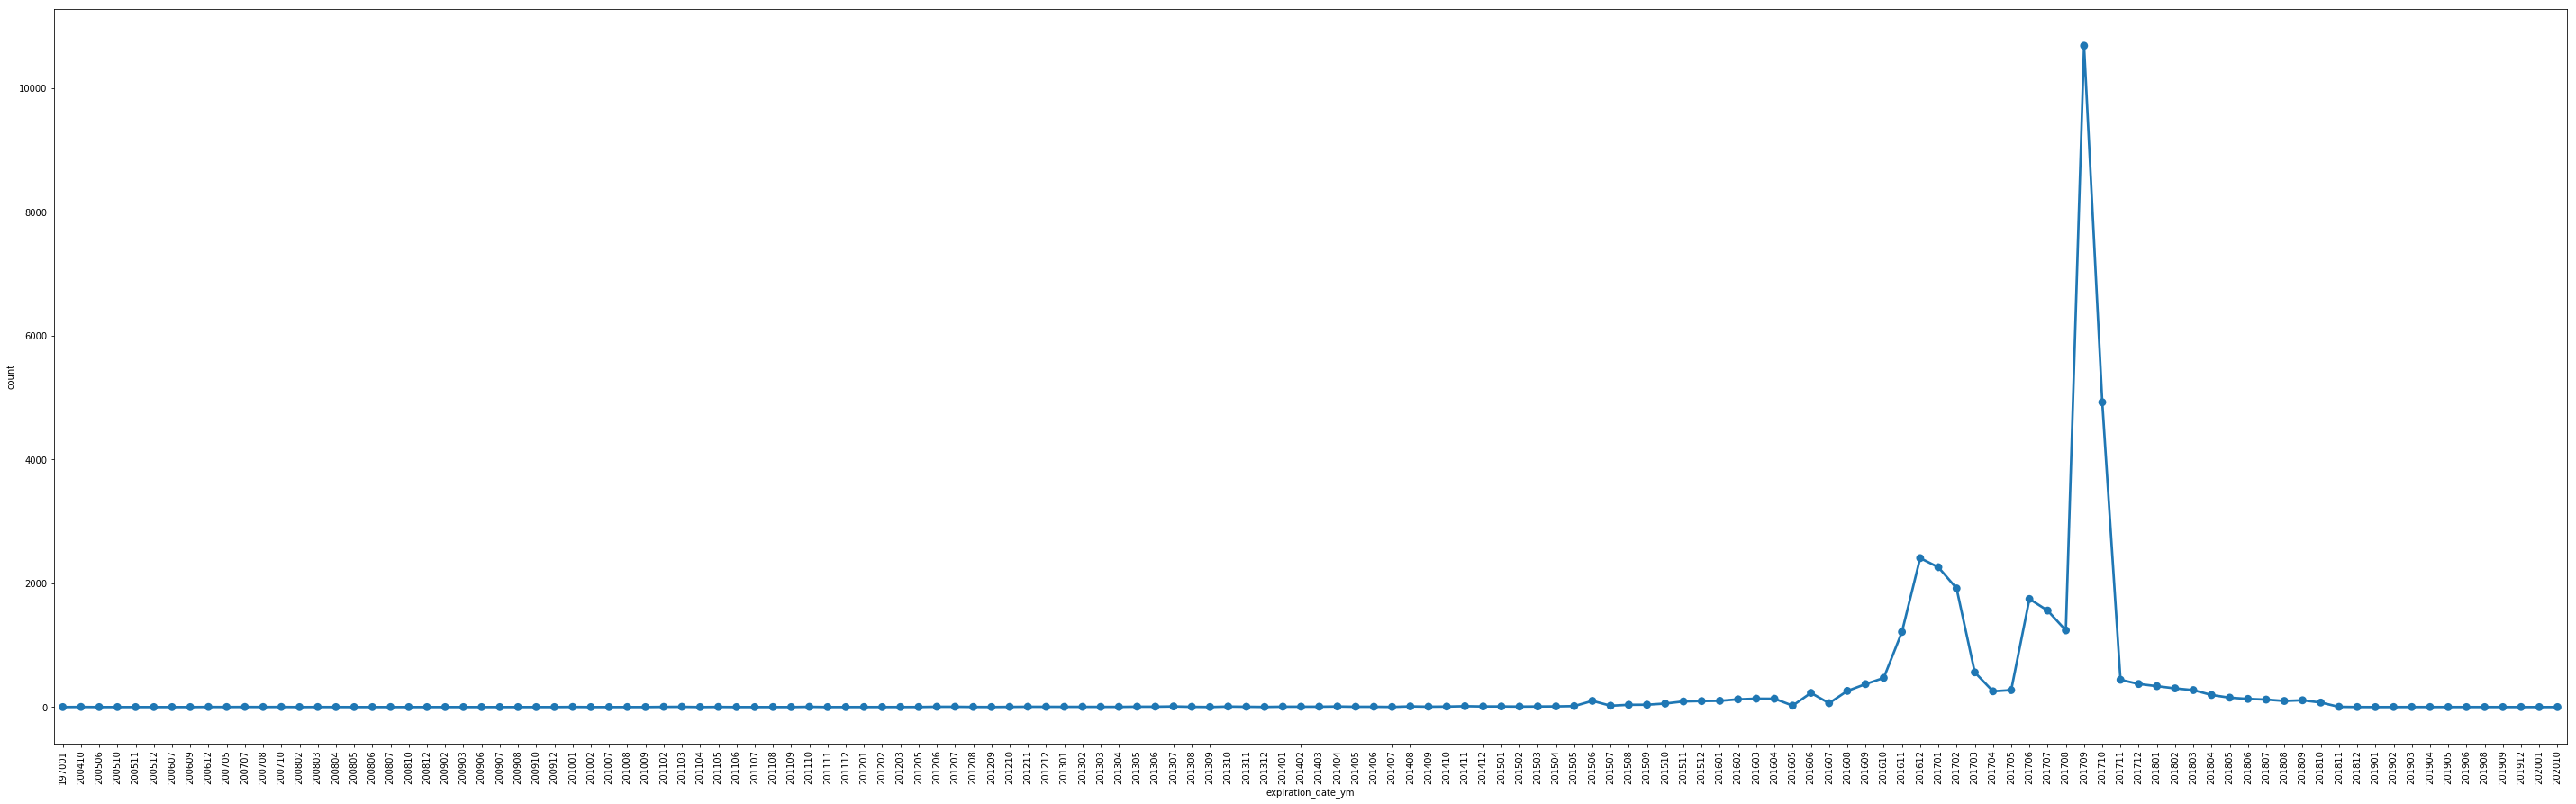

In [15]:
# Consider year, month.
count_df = train_df[['msno', 'expiration_date']].drop_duplicates('msno').copy()
count_df['expiration_date_ym'] = count_df['expiration_date'].apply(transform_init_time_to_ym)

tmp_count_df = count_df[['msno', 'expiration_date_ym']].groupby('expiration_date_ym').agg('count').reset_index()

tmp_count_df.columns = ['expiration_date_ym', 'count']
tmp_count_df

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.pointplot(x='expiration_date_ym', y='count', data=tmp_count_df)
plt.show()

# ===================================================================================================================
count_df = members_df[['msno', 'expiration_date']].copy()
count_df['expiration_date_ym'] = count_df['expiration_date'].apply(transform_init_time_to_ym)

tmp_count_df = count_df[['msno', 'expiration_date_ym']].groupby('expiration_date_ym').agg('count').reset_index()

tmp_count_df.columns = ['expiration_date_ym', 'count']
tmp_count_df

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.pointplot(x='expiration_date_ym', y='count', data=tmp_count_df)
plt.show()

The peak occurs in **Sep. 2017**.
Many users expirate **between Nov. 2016 and Feb. 2017**.

I guess since this expiration comes when this period, the registration grows rapidly then.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 4 columns):
expiration_date_ym    129 non-null int64
replay_pb             129 non-null float64
play_count            129 non-null int64
replay_count          129 non-null int32
dtypes: float64(1), int32(1), int64(2)
memory usage: 3.6 KB
None


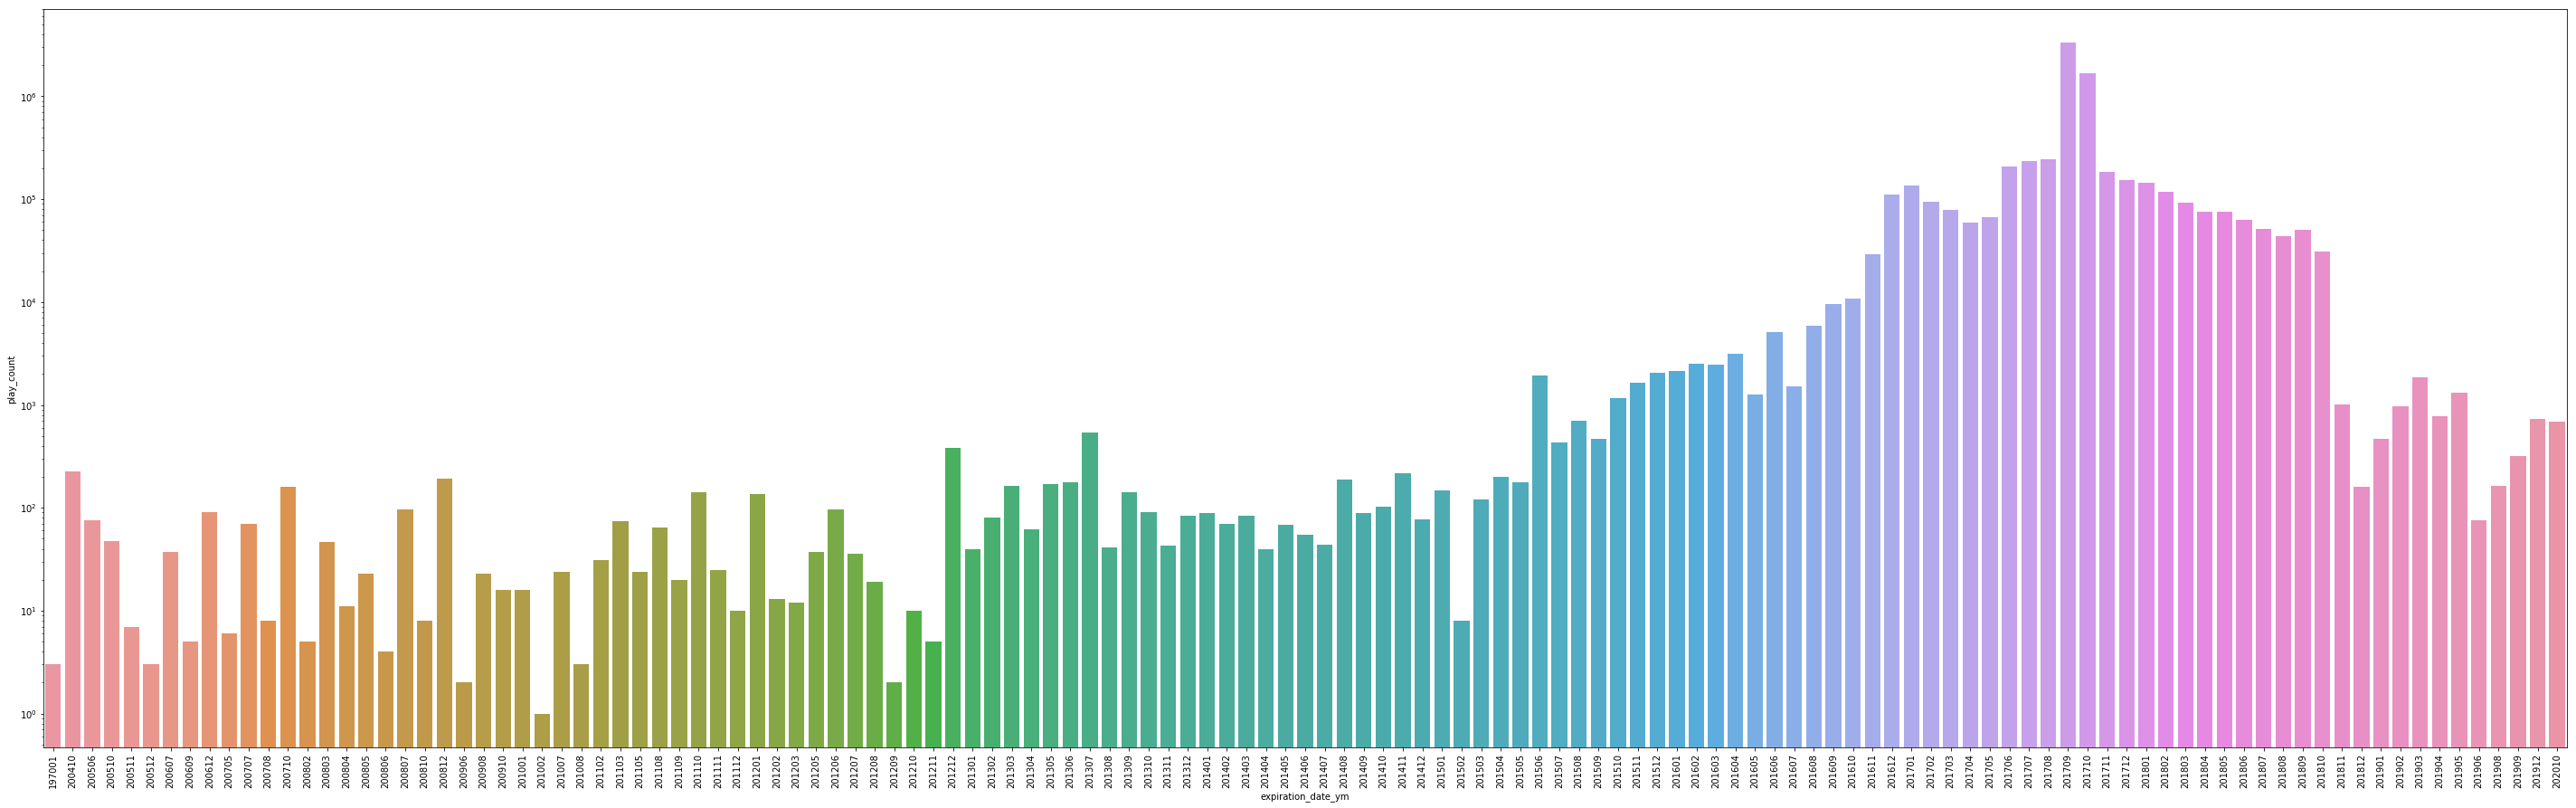

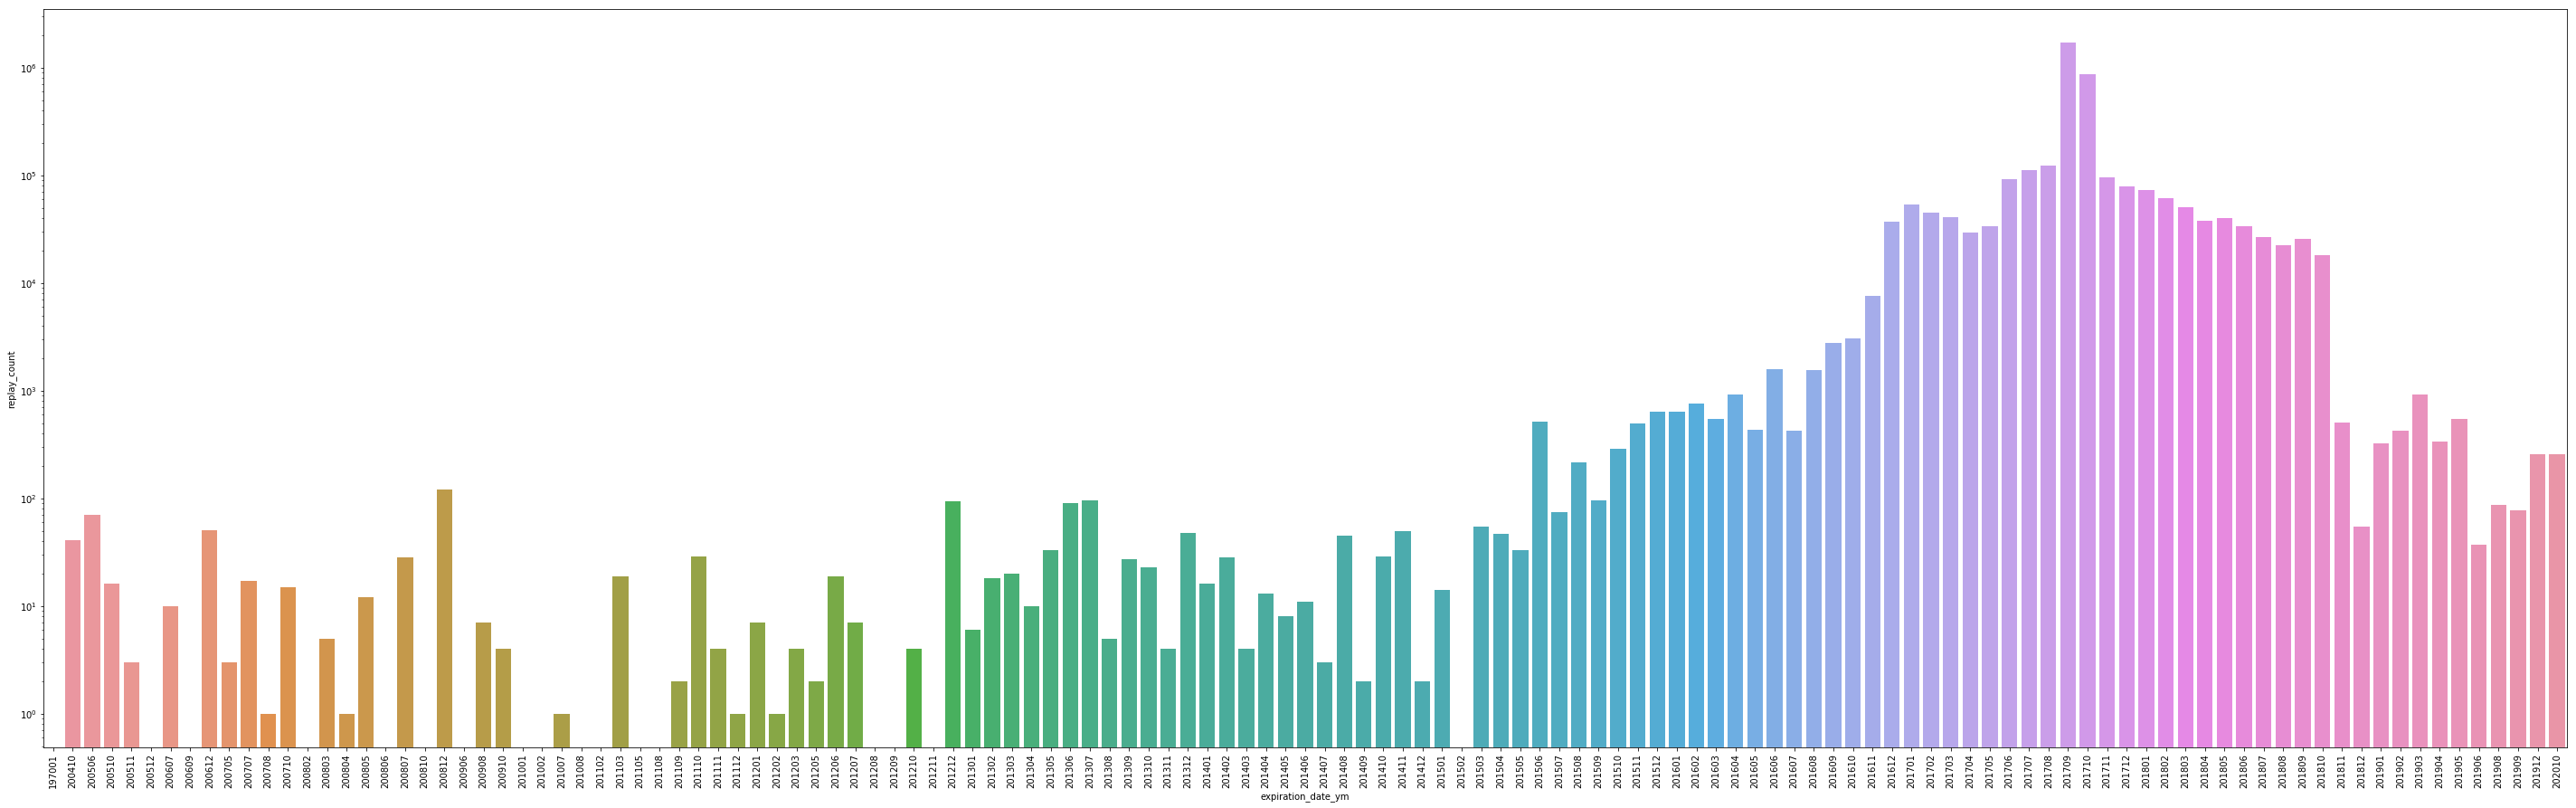

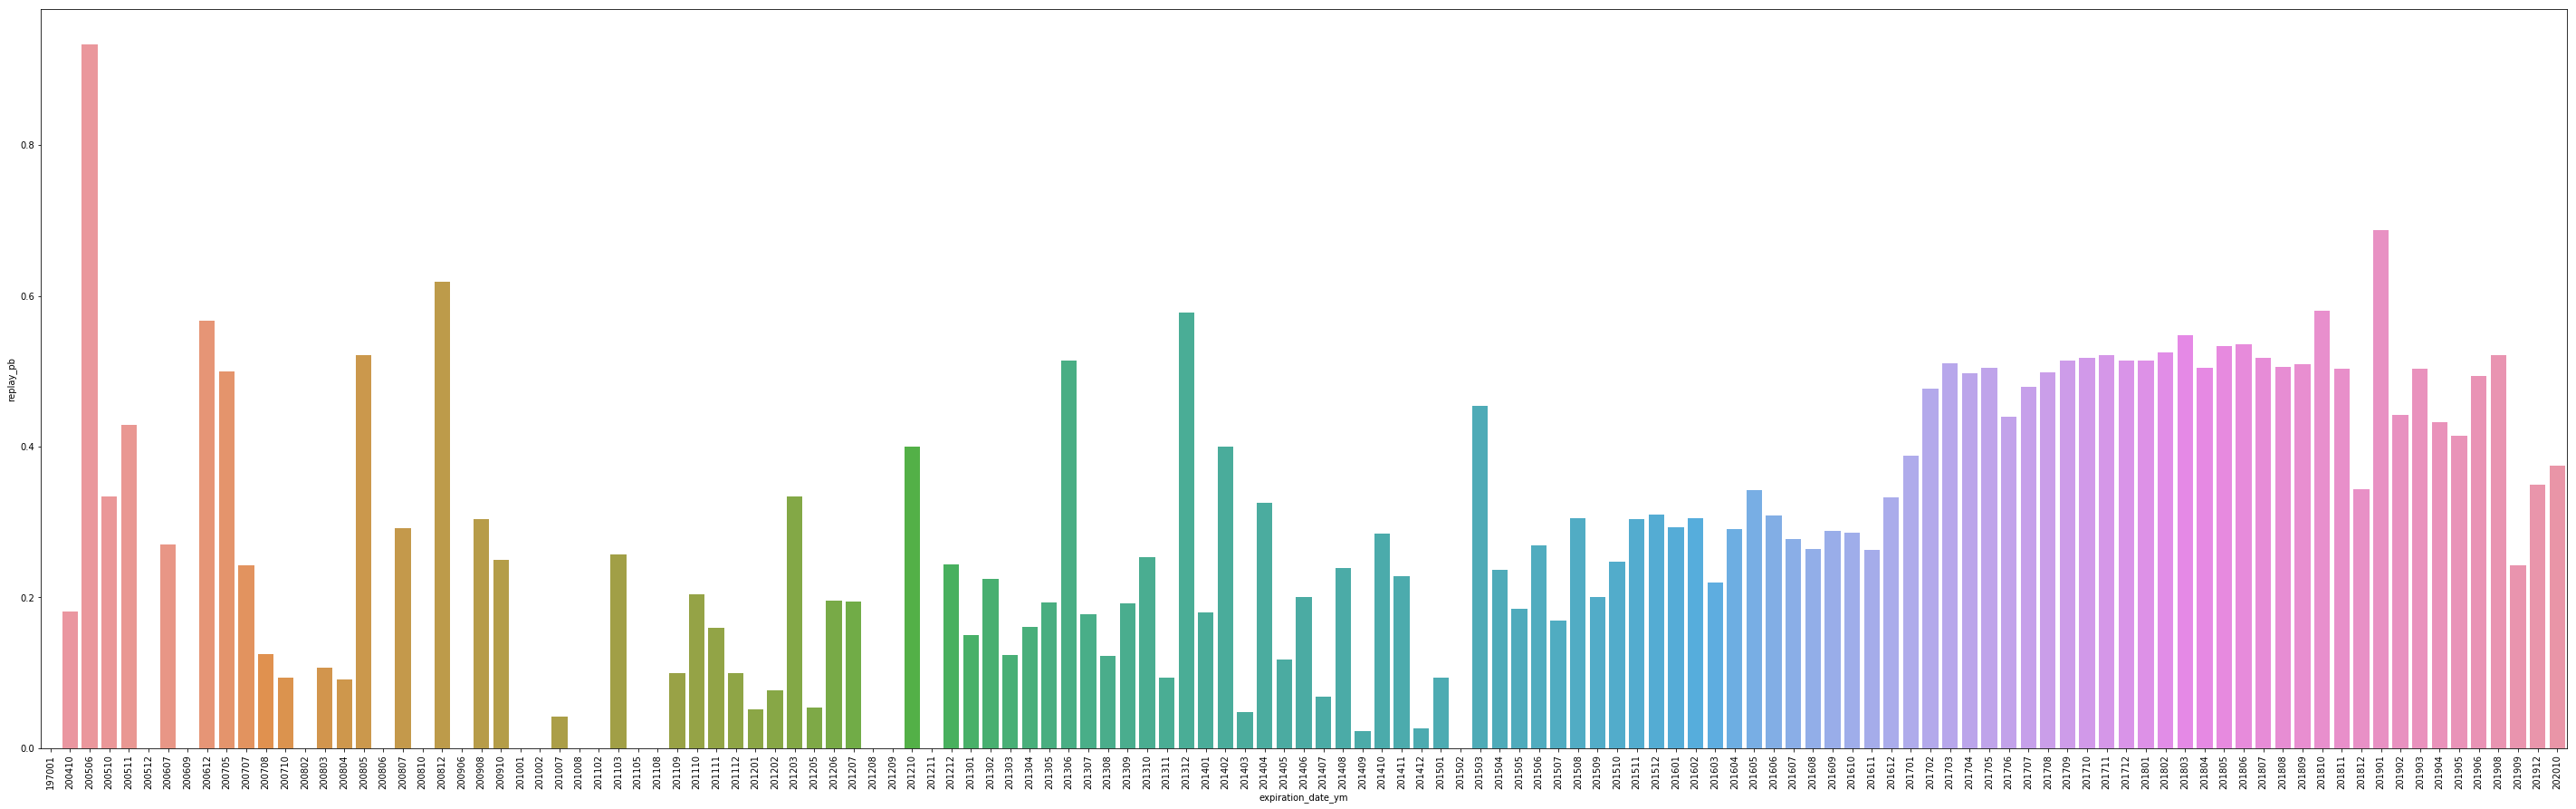

0.203679581778
0.204962242482
0.99984427254


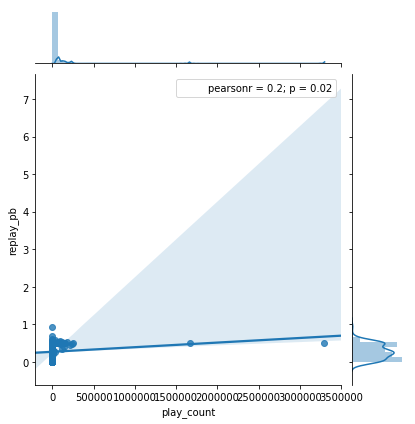

,expiration_date_ym,replay_pb,play_count,replay_count
103,201709,0.513854,3298133,1694759
104,201710,0.517333,1667296,862548
102,201708,0.498223,245055,122092
101,201707,0.478953,234052,112100
100,201706,0.439425,208923,91806
105,201711,0.520936,183466,95573
106,201712,0.513867,154787,79540
107,201801,0.514003,142795,73397
95,201701,0.388434,136471,53010
108,201802,0.525517,117254,61618


In [16]:
count_df = train_df[['msno', 'expiration_date', 'target']].copy()
count_df['expiration_date_ym'] = count_df['expiration_date'].apply(transform_init_time_to_ym)

exp_df = count_df[['expiration_date_ym', 'target']].groupby('expiration_date_ym').agg(['mean', 'count']).reset_index()
exp_df.columns = ['expiration_date_ym', 'replay_pb', 'play_count']

exp_df['replay_count'] = (exp_df['replay_pb'] * exp_df['play_count']).astype(np.int32)

print(exp_df.info())
plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.barplot(x='expiration_date_ym', y='play_count', data=exp_df.sort_values(by=['play_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
g = sns.barplot(x='expiration_date_ym', y='replay_count', data=exp_df.sort_values(by=['replay_count'], ascending=False))
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(50, 15))
plt.xticks(rotation=90)
sns.barplot(x='expiration_date_ym', y='replay_pb', data=exp_df.sort_values(by=['replay_count'], ascending=False))
plt.show()

print(exp_df['replay_count'].corr(exp_df['replay_pb']))
print(exp_df['play_count'].corr(exp_df['replay_pb']))
print(exp_df['play_count'].corr(exp_df['replay_count']))

g = sns.jointplot(x="play_count", y="replay_pb", data=exp_df, kind="reg")
plt.show()
exp_df.sort_values(by=['play_count'], ascending=False)

So many users expirate on **Sep. and Oct. 2017**.